# Projet de Machine Learning 
## Gym Members Exercise Dataset
### EHRHART Elsa, SLISSE Paul, STAUB Guillaume, HOSSEINI Arman
(Notebook Python)

#### **I.Pre-proccessing des données**

On va ici sans entrer dans le détail faire la même chose que les parties I.1, I.2 et I.3 du notebook R afin de préparer nos données.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
path="./gym_members_exercise_tracking.csv"
gym=pd.read_csv(path,sep=",",header=0)
gym.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [2]:
gym["Gender"]=pd.Categorical(gym["Gender"],ordered=False)
gym["Workout_Type"]=pd.Categorical(gym["Workout_Type"],ordered=False)
gym["Experience_Level"]=pd.Categorical(gym["Experience_Level"],ordered=True)
gym.dtypes

Age                                 int64
Gender                           category
Weight (kg)                       float64
Height (m)                        float64
Max_BPM                             int64
Avg_BPM                             int64
Resting_BPM                         int64
Session_Duration (hours)          float64
Calories_Burned                   float64
Workout_Type                     category
Fat_Percentage                    float64
Water_Intake (liters)             float64
Workout_Frequency (days/week)       int64
Experience_Level                 category
BMI                               float64
dtype: object

In [3]:
gym["LWeight"]=gym["Weight (kg)"].map(lambda x:np.log(x))
gym["LBMI"]=gym["BMI"].map(lambda x:np.log(x))
#gym["LWater_Intake"]=gym["Water_Intake (liters)"].map(lambda x:np.log(x))
#gym["Fat_Percentage_S"]=gym["Fat_Percentage"].map(lambda x:x**2/100)
#gym["SHeight"]=gym["Height (m)"].map(lambda x:np.sqrt(x))
del gym["Weight (kg)"]
del gym["BMI"]
#del gym["Water_Intake (liters)"]
#del gym["Fat_Percentage"]
#del gym["Height (m)"]
gym.head()

,Age,Gender,Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,LWeight,LBMI
0,56,Male,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,4.480740,3.407842
1,46,Female,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,4.316154,3.465736
2,32,Female,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,4.220977,3.207208
3,25,Male,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,3.974058,2.912894
4,38,Male,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,3.830813,2.666534


In [4]:
print(gym.isnull().sum())

Age                              0
Gender                           0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
LWeight                          0
LBMI                             0
dtype: int64


Il n'y a aucune valeur manquante dans le jeu de données.

# **II.Prédiction des calories brûlées (Régression)**

Nous souhaitons prédire le nombre de calories brulées, nous comparons donc différentes méthodes de régression afin de s'assurer une prédiction fiable.

In [5]:
from sklearn.preprocessing import StandardScaler  
gym_dummies=pd.get_dummies(gym[["Gender","Workout_Type","Experience_Level"]])
gym_quant=gym[["Age","Height (m)","Max_BPM","Avg_BPM","Resting_BPM","Session_Duration (hours)","Fat_Percentage","Water_Intake (liters)","Workout_Frequency (days/week)","LWeight","LBMI"]]
X=pd.concat([gym_dummies,gym_quant],axis=1)
Y=gym["Calories_Burned"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) # Taille de l'échantillon test : 20%


# L'algorithme des réseaux de neurones nécessite éventuellement une normalisation 
# des variables explicatives avec les commandes ci-dessous
scaler = StandardScaler()  
scaler.fit(X_train)  
Xr_train = scaler.transform(X_train)  
# Meme transformation sur le test
Xr_test = scaler.transform(X_test)

> Utiliser l'échantillon d'apprentissage pour l'entraîner est nécessaire, afin de pouvoir évaluer le modèle sur le reste des données sans avoir un biais au niveau de l'estimation de l'erreur de généralisation (l'estimateur est trop optimiste).

**Régression Linéaire Totale**

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.feature_selection import SequentialFeatureSelector

In [7]:
reglin=LinearRegression().fit(X_train,Y_train)
reglinpred=reglin.predict(X_test)
reglin_coeff = pd.DataFrame(columns=X.columns)
reglin_coeff.loc[1]=reglin.coef_
reglin_coeff

,Gender_Female,Gender_Male,Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga,Experience_Level_1,Experience_Level_2,Experience_Level_3,Age,Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),LWeight,LBMI
1,-40.616945,40.616945,4.300074,-0.613634,0.854746,-4.541186,5.393996,3.487243,-8.881239,-3.303993,48.236338,0.117404,6.154324,0.608697,713.889762,-1.024192,-2.42287,4.03075,-24.770089,31.892252


In [8]:
print("MSE=",mean_squared_error(reglinpred,Y_test))
print("R2=",r2_score(reglinpred,Y_test))

MSE= 1674.4201880746205
R2= 0.9794455159771281


> On voit qu'on a un score du R2 vraiment proche de 1 ce qui signifie que les prédictions sont assez proche des vraies valeurs. C'est un résultat étonnament bon pour un modèle linéaire surtout avec l'entiereté des variables explicatives.

**Régression Linéaire avec forward selection**

In [9]:
def compute_aic(n, mse, k):
    return n * math.log(mse) + 2 * k

sfs_lin = SequentialFeatureSelector(LinearRegression(), direction="forward", cv=5)
sfs_lin.fit(Xr_train, Y_train)
X_forward_train=sfs_lin.transform(Xr_train)
X_forward_test=sfs_lin.transform(Xr_test)
selected_features = X.columns[sfs_lin.get_support()]
print("Variables sélectionnées :", selected_features)
reglin_forward=LinearRegression().fit(X_forward_train,Y_train)
reglin_forward_pred=reglin_forward.predict(X_forward_test)

Variables sélectionnées : Index(['Gender_Female', 'Gender_Male', 'Workout_Type_Cardio', 'Age', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Fat_Percentage',
       'Water_Intake (liters)', 'LWeight'],
      dtype='object')


In [10]:
reglin_forward_coeff = pd.DataFrame(columns=selected_features)
reglin_forward_coeff.loc[1]=reglin_forward.coef_
reglin_forward_coeff

,Gender_Female,Gender_Male,Workout_Type_Cardio,Age,Avg_BPM,Resting_BPM,Session_Duration (hours),Fat_Percentage,Water_Intake (liters),LWeight
1,-21.270419,21.270419,2.335128,-40.011499,88.53477,4.55536,240.466199,-3.777115,-1.999065,2.252122


In [11]:
print("MSE=",mean_squared_error(reglin_forward_pred,Y_test))
print("R2=",r2_score(reglin_forward_pred,Y_test))

MSE= 1637.5141864739298
R2= 0.9799270602788545


> On a ici utilisé un algorithme de forward selection pour choisir les variables explicatives. On voit qu'on a supprimé quelques variables par rapport au modèle linéaire total. Les résultats sont satisfaisant et dans le même ordre de grandeur que le modèle précédant (résultat légèrement meilleurs ici).

**Régression Lasso**

In [12]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
model=Lasso()
param=[{"alpha":[0.05]+[0.1*i for i in range(1,9)]+[1,2]}]
regLasso = GridSearchCV(Lasso(), param,cv=5,n_jobs=-1)
regLassOpt=regLasso.fit(Xr_train, Y_train)
regLassOpt.best_params_["alpha"]
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (regLassOpt.best_score_,regLassOpt.best_params_))

Meilleur R2 = 0.977534, Meilleur paramètre = {'alpha': 0.8}


In [13]:
prev=regLassOpt.predict(Xr_test)
print("MSE=",mean_squared_error(prev,Y_test))
print("R2=",r2_score(Y_test,prev))

MSE= 1640.7167506205892
R2= 0.9803330387013541


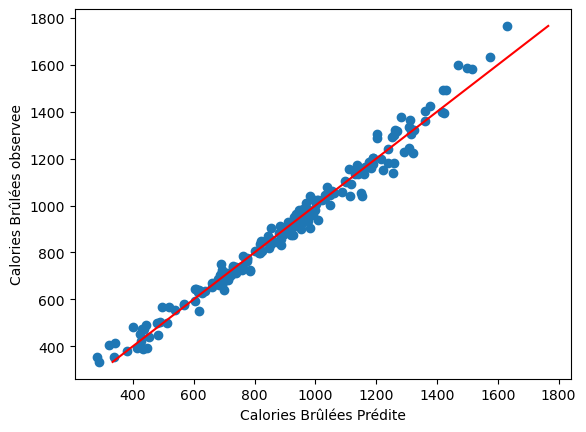

In [14]:
p=np.min(Y_test),np.max(Y_test)
plt.plot(prev,Y_test,"o")
plt.plot(p,p,"r-")
plt.xlabel(u"Calories Brûlées Prédite")
plt.ylabel("Calories Brûlées observee")
plt.show()

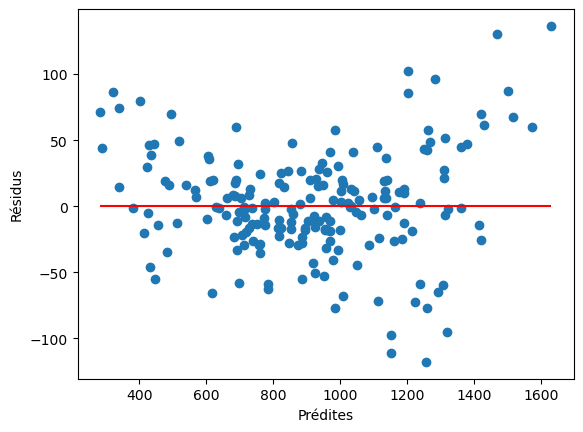

In [15]:
plt.plot(prev,Y_test-prev,"o")
plt.xlabel(u"Prédites")
plt.ylabel(u"Résidus")
plt.hlines(0,min(prev),max(prev),"r")
plt.show()

Lasso conserve 13 variables et en supprime 7


Text(0.5, 1.0, 'Coefficients du modèle lasso')

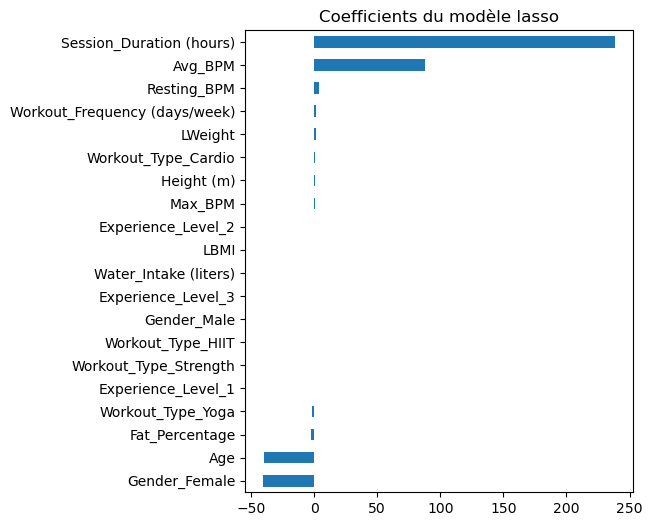

In [17]:
regLasso=Lasso(alpha=regLassOpt.best_params_['alpha'])
model_lasso=regLasso.fit(Xr_train,Y_train)
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
print("Lasso conserve " + str(sum(coef != 0)) + " variables et en supprime " +  str(sum(coef == 0)))
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (5.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title(u"Coefficients du modèle lasso")

> On a utilisé ici la pénalisation Lasso pour faire la sélection de variables. On conserve avec ce modèle un peu plus de variables explicatives qu'avec la forward selection mais on obtient des résultats de performance très similaires.

## SVR

In [105]:
from sklearn.svm import SVR
param={"C":np.arange(5,100,5), "epsilon":np.arange(0.01,0.5,0.05)}
svm = GridSearchCV(SVR(),param,cv=10,n_jobs=-1)
svmOpt=svm.fit(Xr_train, Y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - svmOpt.best_score_,svmOpt.best_params_))

print(svmOpt.best_params_)

Meilleur score = 0.035629, Meilleur paramètre = {'C': 95, 'epsilon': 0.01}
{'C': 95, 'epsilon': 0.01}


In [106]:
# erreur de prévision sur le test
1-svmOpt.score(Xr_test,Y_test)

0.03688844590124607

Fin de la séance ici, valeurs a vérifier (eps)

## Arbres

Meilleur score = 0.074227, Meilleur paramètre = {'max_depth': 7}
Calories_Burned  333.0   353.0   354.0   380.0   386.0   393.0   394.0   \
row_0                                                                     
311.000000            0       0       0       0       0       1       0   
337.000000            1       1       1       1       1       0       0   
388.000000            0       0       0       0       0       0       0   
418.000000            0       0       0       0       0       0       0   
431.750000            0       0       0       0       0       0       0   
...                 ...     ...     ...     ...     ...     ...     ...   
1398.000000           0       0       0       0       0       0       0   
1438.600000           0       0       0       0       0       0       0   
1465.600000           0       0       0       0       0       0       0   
1506.250000           0       0       0       0       0       0       0   
1691.857143           0       0    

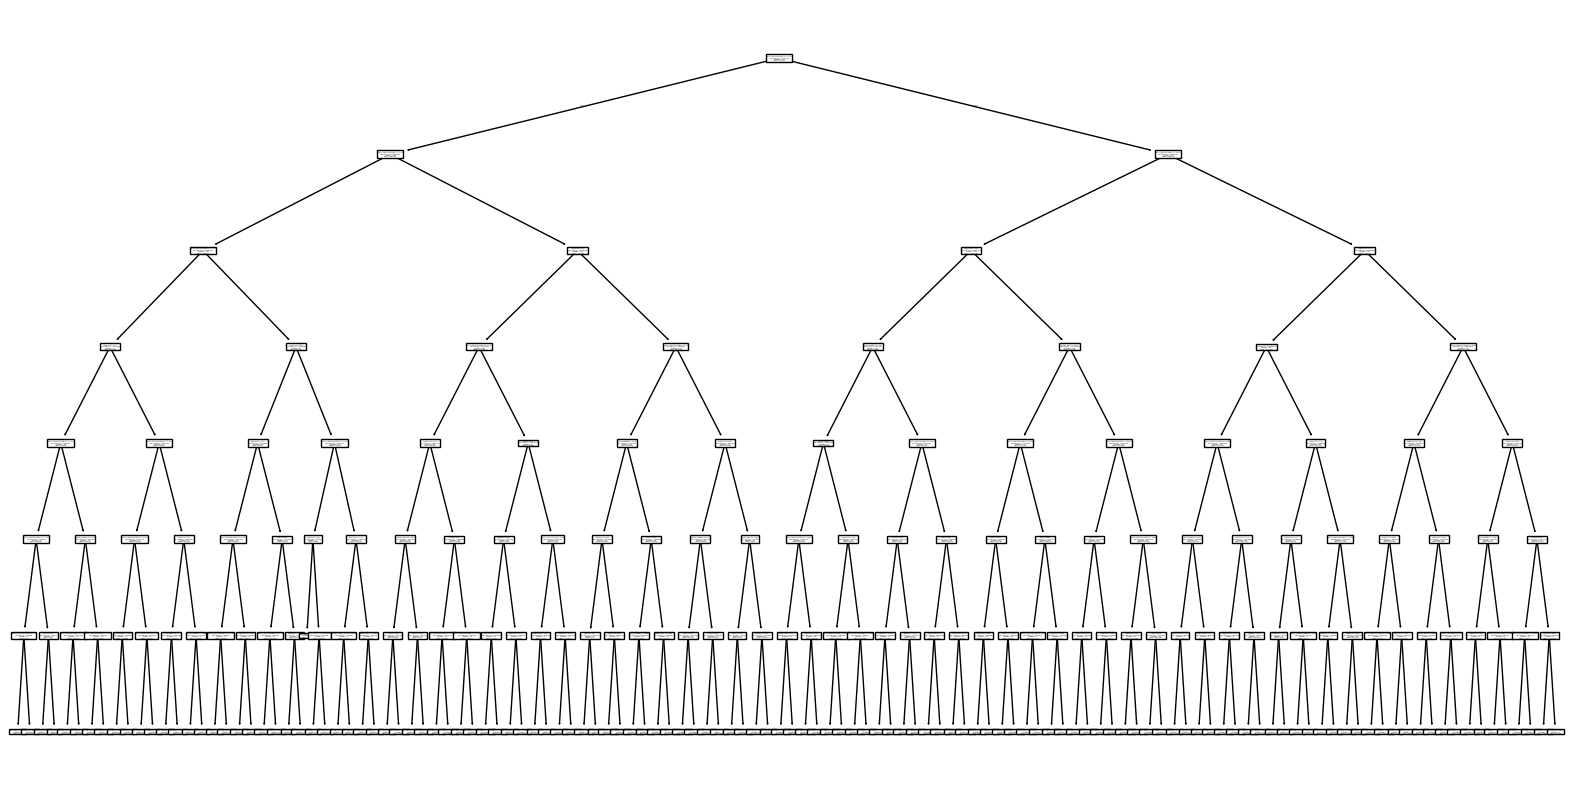

In [70]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

tree= GridSearchCV(DecisionTreeRegressor(),param,cv=10,n_jobs=-1)
treeOpt=tree.fit(Xr_train, Y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - treeOpt.best_score_,treeOpt.best_params_))

# prévision de l'échantillon test
y_chap = treeOpt.predict(Xr_test)
# matrice de confusion
table=pd.crosstab(y_chap,Y_test)
print(table)

treeR=DecisionTreeRegressor(max_depth=treeOpt.best_params_['max_depth'])
treeR.fit(Xr_train,Y_train)

plt.figure(figsize=(20,10))
plot_tree(treeR,feature_names= X.columns.tolist());
plt.show()


In [71]:
# Estimation de l'erreur de prévision
print(f"Erreur de prévision: {round((1-treeOpt.score(Xr_test,Y_test))*100,2)}%")

Erreur de prévision: 5.23%


## Random Forest

In [76]:
from sklearn.ensemble import RandomForestRegressor
param=[{"max_features":list(range(2,10,1))}]
rf= GridSearchCV(RandomForestRegressor(n_estimators=100),
        param,cv=5,n_jobs=-1)
rfOpt=rf.fit(Xr_train, Y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - rfOpt.best_score_,rfOpt.best_params_))

Meilleur score = 0.040491, Meilleur paramètre = {'max_features': 9}


In [77]:
# définition des paramètres
forest = RandomForestRegressor(n_estimators=500, 
   max_depth=None,
   min_samples_split=2, min_samples_leaf=1, 
   max_features='sqrt', max_leaf_nodes=None,
   bootstrap=True, oob_score=True)
# apprentissage
rfFit = forest.fit(Xr_train,Y_train)
print(f"Erreur Out-of-Bag: {1-rfFit.oob_score_}")

Erreur Out-of-Bag: 0.07943058274466896


In [79]:
# erreur de prévision sur le test
print(f"Erreur de prévision: {1-rfFit.score(Xr_test,Y_test)}")

Erreur de prévision: 0.08996051666566951


In [81]:
# prévision
y_chap = rfFit.predict(Xr_test)
# matrice de confusion
table=pd.crosstab(y_chap,Y_test)
print("Matrice de confusion:")
print(table)

Matrice de confusion:
Calories_Burned  333.0   353.0   354.0   380.0   386.0   393.0   394.0   \
row_0                                                                     
462.826               0       0       1       0       0       0       0   
470.112               0       0       0       0       0       0       0   
477.246               0       0       0       0       0       0       0   
492.950               0       0       0       0       0       0       0   
510.172               0       0       0       0       0       0       0   
...                 ...     ...     ...     ...     ...     ...     ...   
1376.604              0       0       0       0       0       0       0   
1384.810              0       0       0       0       0       0       0   
1408.196              0       0       0       0       0       0       0   
1457.604              0       0       0       0       0       0       0   
1502.062              0       0       0       0       0       0       0   

Ca

Session_Duration (hours) 0.2885027912818599
Fat_Percentage 0.11605847825129616
Experience_Level_3 0.10213312452980577
Avg_BPM 0.07611742806155905
Experience_Level_1 0.05640092784798198
Workout_Frequency (days/week) 0.05593754329821123
Water_Intake (liters) 0.05110044054535305
LWeight 0.042145916790127046
Age 0.03477296757337793
LBMI 0.031962722861067695
Height (m) 0.029953261171883662
Max_BPM 0.02875571294013457
Resting_BPM 0.026097972984536345
Experience_Level_2 0.024973562131378774
Gender_Male 0.0079576002975999
Workout_Type_Cardio 0.005959222777530448
Gender_Female 0.005629462505484573
Workout_Type_Strength 0.005453164534834414
Workout_Type_HIIT 0.005276318273448957
Workout_Type_Yoga 0.004811381342528571


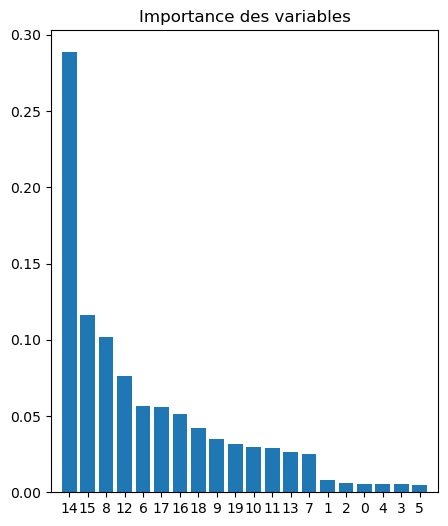

In [82]:
rf= RandomForestRegressor(n_estimators=100,max_features=2)
rfFit=rf.fit(Xr_train, Y_train)
# Importance décroissante des variables
importances = rfFit.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(Xr_train.shape[1]):
    print(X.columns[indices[f]], importances[indices[f]])

plt.figure()
plt.title("Importance des variables")
plt.bar(range(Xr_train.shape[1]), importances[indices]);
plt.xticks(range(Xr_train.shape[1]), indices);
plt.xlim([-1, Xr_train.shape[1]]);
plt.show()

#

## Réseau de Neurones